In [1]:
%matplotlib inline

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!pip3 install torch torchvision torchaudio

/usr/local/lib/python3.8/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib/python3.8/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 67.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 91.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 7.1 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
You should consider upg


Audio Feature Extractions
=========================

``torchaudio`` implements feature extractions commonly used in the audio
domain. They are available in ``torchaudio.functional`` and
``torchaudio.transforms``.

``functional`` implements features as standalone functions.
They are stateless.

``transforms`` implements features as objects,
using implementations from ``functional`` and ``torch.nn.Module``.
They can be serialized using TorchScript.
TorchScript를 사용하여 직렬화할 수 있습니다.


In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.9.0
0.9.0


C:\Users\JangSeongHyun\anaconda3\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


Preparation
-----------

<div class="alert alert-info"><h4>Note</h4><p>When running this tutorial in Google Colab, install the required packages

   .. code::

      !pip install librosa</p></div>




In [4]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")


def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

  0%|          | 0.00/106k [00:00<?, ?B/s]

Overview of audio features
--------------------------

The following diagram shows the relationship between common audio features
and torchaudio APIs to generate them.

![](https://download.pytorch.org/torchaudio/tutorial-assets/torchaudio_feature_extractions.png)


For the complete list of available features, please refer to the
documentation.




Spectrogram
-----------

To get the frequency make-up of an audio signal as it varies with time,
you can use :py:func:`torchaudio.transforms.Spectrogram`.\
시간에 따라 변하는 오디오 신호의 주파수 구성을 얻으려면 :py:func:torchaudio.transforms.Spectrogram을 사용할 수 있습니다.




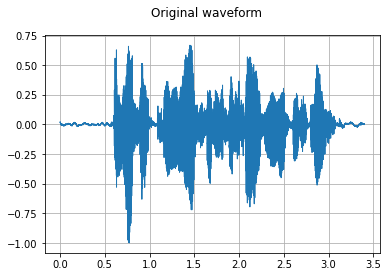

In [5]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Original waveform")
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

In [6]:
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

In [7]:
# Perform transform
spec = spectrogram(SPEECH_WAVEFORM)

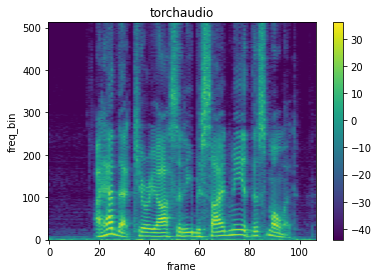

In [8]:
plot_spectrogram(spec[0], title="torchaudio")

GriffinLim
----------

To recover a waveform from a spectrogram, you can use ``GriffinLim``.




In [9]:
torch.random.manual_seed(0)

n_fft = 1024
win_length = None
hop_length = 512

spec = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)(SPEECH_WAVEFORM)

In [10]:
griffin_lim = T.GriffinLim(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)

In [11]:
reconstructed_waveform = griffin_lim(spec)

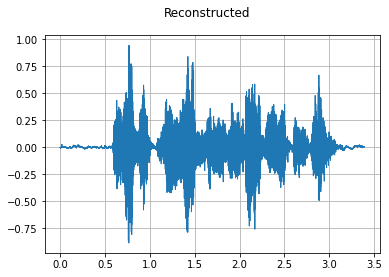

In [12]:
plot_waveform(reconstructed_waveform, SAMPLE_RATE, title="Reconstructed")
Audio(reconstructed_waveform, rate=SAMPLE_RATE)

Mel Filter Bank
---------------

:py:func:`torchaudio.functional.melscale_fbanks` generates the filter bank
for converting frequency bins to mel-scale bins.\
:py:func:torchaudio.functional.melscale_fbanks는 주파수 빈을 멜 스케일 빈으로 변환하기 위한 필터 뱅크를 생성합니다.

Since this function does not require input audio/features, there is no
equivalent transform in :py:func:`torchaudio.transforms`.\
이 함수는 입력 오디오/기능이 필요하지 않기 때문에 :py:func:torchaudio.transforms에 동등한 변환이 없습니다.

In [13]:
n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.0,
    f_max=sample_rate / 2.0,
    sample_rate=sample_rate,
    norm="slaney",
)

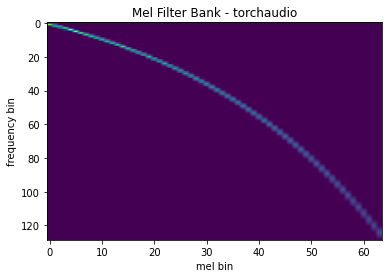

In [14]:
plot_fbank(mel_filters, "Mel Filter Bank - torchaudio")

Comparison against librosa
~~~~~~~~~~~~~~~~~~~~~~~~~~

For reference, here is the equivalent way to get the mel filter bank with ``librosa``.




In [25]:
mel_filters_librosa = librosa.filters.mel(
    sr=sample_rate,
    n_fft=n_fft,
    n_mels=n_mels,
    fmin=0.0,
    fmax=sample_rate / 2.0,
    norm=None ,#"slaney"
    htk=True,
).T

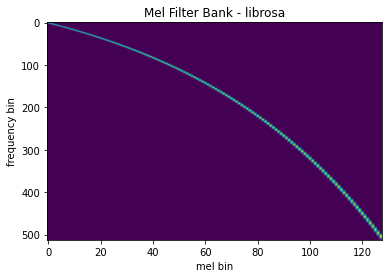

ValueError: operands could not be broadcast together with shapes (129,64) (513,128) 

In [26]:
plot_fbank(mel_filters_librosa, "Mel Filter Bank - librosa")

mse = torch.square(mel_filters - mel_filters_librosa).mean().item()
print("Mean Square Difference: ", mse)

MelSpectrogram
--------------

Generating a mel-scale spectrogram involves generating a spectrogram
and performing mel-scale conversion. \
멜 스케일 스펙트로그램 생성에는 스펙트로그램 생성 및 멜 스케일 변환 수행이 포함됩니다.

In ``torchaudio``, :py:func:`torchaudio.transforms.MelSpectrogram` provides
this functionality.\
``torchaudio``의 :py:func:`torchaudio.transforms.MelSpectrogram`이 이 기능을 제공합니다.


In [27]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm=None ,#"slaney"
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(SPEECH_WAVEFORM)

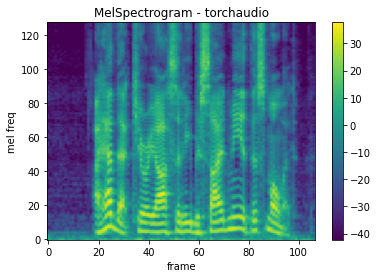

In [28]:
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

Comparison against librosa
~~~~~~~~~~~~~~~~~~~~~~~~~~

For reference, here is the equivalent means of generating mel-scale spectrograms with ``librosa``.

참고로 여기 ``librosa``를 사용하여 멜 스케일 스펙트로그램을 생성하는 동등한 수단이 있습니다.


In [29]:
melspec_librosa = librosa.feature.melspectrogram(
    y=SPEECH_WAVEFORM.numpy()[0],
    sr=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=win_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    n_mels=n_mels,
    norm=None, #"slaney"
    htk=True,
)

TypeError: mel() got an unexpected keyword argument 'win_length'

In [ ]:
plot_spectrogram(melspec_librosa, title="MelSpectrogram - librosa", ylabel="mel freq")

mse = torch.square(melspec - melspec_librosa).mean().item()
print("Mean Square Difference: ", mse)

MFCC
----




In [ ]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "n_mels": n_mels,
        "hop_length": hop_length,
        "mel_scale": "htk",
    },
)

mfcc = mfcc_transform(SPEECH_WAVEFORM)

In [ ]:
plot_spectrogram(mfcc[0])

Comparison against librosa
~~~~~~~~~~~~~~~~~~~~~~~~~~




In [ ]:
melspec = librosa.feature.melspectrogram(
    y=SPEECH_WAVEFORM.numpy()[0],
    sr=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    n_mels=n_mels,
    htk=True,
    norm=None,
)

mfcc_librosa = librosa.feature.mfcc(
    S=librosa.core.spectrum.power_to_db(melspec),
    n_mfcc=n_mfcc,
    dct_type=2,
    norm="ortho",
)

In [ ]:
plot_spectrogram(mfcc_librosa)

mse = torch.square(mfcc - mfcc_librosa).mean().item()
print("Mean Square Difference: ", mse)

LFCC( Linear Frequency Cepstral Coefficients)
----




In [ ]:
n_fft = 2048
win_length = None
hop_length = 512
n_lfcc = 256

lfcc_transform = T.LFCC(
    sample_rate=sample_rate,
    n_lfcc=n_lfcc,
    speckwargs={
        "n_fft": n_fft,
        "win_length": win_length,
        "hop_length": hop_length,
    },
)

lfcc = lfcc_transform(SPEECH_WAVEFORM)
plot_spectrogram(lfcc[0])

Pitch
-----




In [ ]:
pitch = F.detect_pitch_frequency(SPEECH_WAVEFORM, SAMPLE_RATE)

In [ ]:
def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")

    axis2.legend(loc=0)
    plt.show(block=False)


plot_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch)

Kaldi Pitch (beta)
------------------

Kaldi Pitch feature [1] is a pitch detection mechanism tuned for automatic
speech recognition (ASR) applications.\
Kaldi Pitch 기능[1]은 자동 음성 인식(ASR) 애플리케이션을 위해 조정된 피치 감지 메커니즘입니다.\
This is a beta feature in ``torchaudio``,
and it is available as :py:func:`torchaudio.functional.compute_kaldi_pitch`.

1. A pitch extraction algorithm tuned for automatic speech recognition\
    자동 음성 인식을 위해 조정된 음높이 추출 알고리즘

   Ghahremani, B. BabaAli, D. Povey, K. Riedhammer, J. Trmal and S.
   Khudanpur

   2014 IEEE International Conference on Acoustics, Speech and Signal
   Processing (ICASSP), Florence, 2014, pp. 2494-2498, doi:
   10.1109/ICASSP.2014.6854049.
   [`abstract <https://ieeexplore.ieee.org/document/6854049>`__],
   [`paper <https://danielpovey.com/files/2014_icassp_pitch.pdf>`__]




In [ ]:
pitch_feature = F.compute_kaldi_pitch(SPEECH_WAVEFORM, SAMPLE_RATE)
pitch, nfcc = pitch_feature[..., 0], pitch_feature[..., 1]

In [ ]:
def plot_kaldi_pitch(waveform, sr, pitch, nfcc):
    _, axis = plt.subplots(1, 1)
    axis.set_title("Kaldi Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    ln1 = axis.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")
    axis.set_ylim((-1.3, 1.3))

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, nfcc.shape[1])
    ln2 = axis2.plot(time_axis, nfcc[0], linewidth=2, label="NFCC", color="blue", linestyle="--")

    lns = ln1 + ln2
    labels = [l.get_label() for l in lns]
    axis.legend(lns, labels, loc=0)
    plt.show(block=False)


plot_kaldi_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch, nfcc)